In [ ]:
pip install pandas

In [ ]:
!pip install plotly

In [ ]:
# Importando todas as bibliotecas necessárias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
music_df = pd.read_csv('/content/music_data.csv') # Carregando dataset.
music_df.head(3) # Vendo as 3 primeiras linhas de dados para confirmar que o dataset foi carregado.

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0


<center>⇆ㅤ ||◁ㅤ❚❚ㅤ▷||ㅤ ↻
<br>
1.0
<br>
𝓢obre os dados + objetivos
</center>

O dataset contém informações detalhadas sobre músicas lançadas entre 1950 e 2019, abrangendo tanto metadados musicais quanto aspectos temáticos das letras. Esse dataset, além de trazer esses dados básicos sobre música, também mostra da evolução da música ao longo das décadas. Abaixo estão as principais colunas do DataFrame:

`𝄞 artist_name:` Nome do artista que lançou a faixa.<br>
`𝄞 track_name:` Nome da faixa musical.<br>
`𝄞 release_date:` Data, ou mais especificamente, ano de lançamento da música, permitindo análise temporal.<br>
`𝄞 genre:` Gênero musical da faixa, útil para identificar padrões por estilo.<br>
`𝄞 lyrics:` Letras da música, permitindo análises de texto e processamento de linguagem natural (NLP).

 <center> 𝄞 Objetivo Dashboard 𝄞 <br>
O objetivo da dashboard interativa será mostrar a evolução da música ao longo dos anos, como os generos, as sensações tiveram seus destaques em cada época, além de permitir busca por palavras e músicas a partir de suas "vibes". </center>

<center>⇆ㅤ ||◁ㅤ❚❚ㅤ▷||ㅤ ↻
<br>
2.0
<br>
𝓛impando dados.
</center>

In [ ]:
# O dataset possuí 31 colunas, e mais de 28 mil linhas.
music_df.shape

(28372, 31)

In [ ]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

A primeira coisa que observamos ao olhar a header do dataset é essa coluna chamada `Unnamed: 0`. Isso se deve ao fato de que a coluna veio importada do arquivo CSV original, e é apenas uma forma de index. Por isso vamos retira-lá.

In [ ]:
music_df = music_df.drop(music_df.columns[0], axis=1) # Removendo a primeira coluna.
music_df.head()

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
# Além disso, a coluna release_date,
# para ser mais adequadamente nomeada, irá se chamar release_year.
music_df.rename(columns={'release_date': 'release_year'}, inplace=True)
music_df.head()


,artist_name,track_name,release_year,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
music_df.isnull().sum().sum()
# Nenhum dado está vazio, o que significa que todas as entradas de dados estão preenchidas.

0

♪ No geral o dataset é simples e está limpo. Como as métricas são muitas, como danceability, romance, sadness, acousticness, vamos posteriormente filtrar um pouco mais o dataset para não serem informações demais.

<center>⇆ㅤ ||◁ㅤ❚❚ㅤ▷||ㅤ ↻
<br>
3.0
<br>
𝓥isualizando dados.
</center>

In [ ]:
unique_genres = music_df['genre'].unique()
print(unique_genres)

['pop' 'country' 'blues' 'jazz' 'reggae' 'rock' 'hip hop']


In [ ]:
unique_topics = music_df['topic'].unique()
print(unique_topics)

['sadness' 'world/life' 'music' 'romantic' 'violence' 'obscene'
 'night/time' 'feelings']


In [ ]:
genre_topic_counts = music_df.groupby(['genre', 'topic']).size().reset_index(name='count')
genre_topic_counts.sample(10)
# A quantidade de músicas que existem para cada gênero e tópico é interessante, já que mostra quais temas as músicas de cada genero fala geralmente.

,genre,topic,count
43,reggae,obscene,647
0,blues,feelings,147
49,rock,music,213
37,pop,sadness,1702
46,reggae,violence,586
2,blues,night/time,355
13,country,sadness,1571
27,jazz,obscene,672
39,pop,world/life,1349
23,hip hop,world/life,45


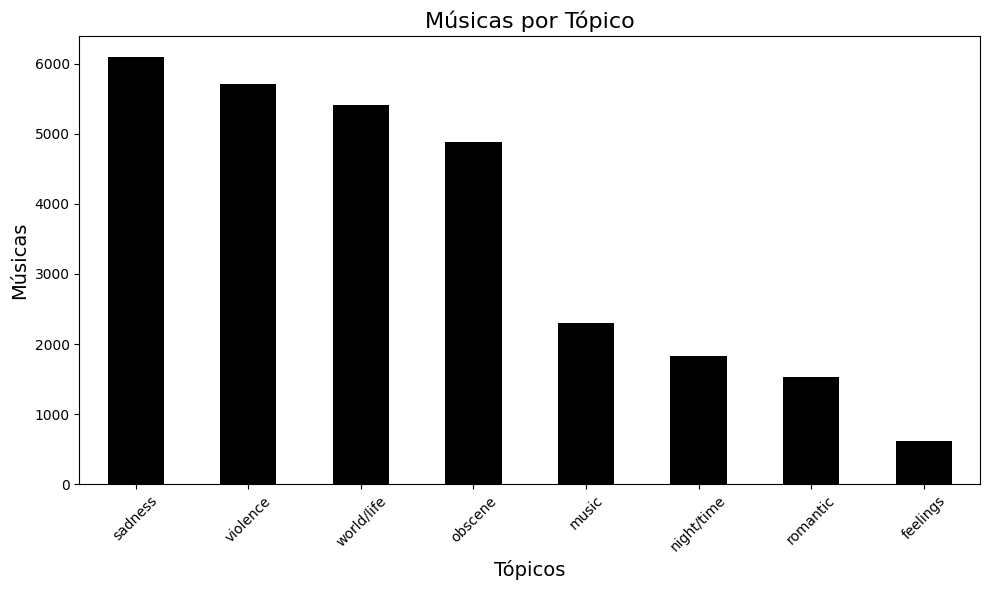

In [ ]:
topic_counts = music_df['topic'].value_counts()

plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='black')
plt.title('Músicas por Tópico', fontsize=16)
plt.xlabel('Tópicos', fontsize=14)
plt.ylabel('Músicas', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

♪ A maioria das músicas tende a falar sobre tópicos como tristeza, violência, a vida e temas obscenos.

In [ ]:
# Tentando entendem melhor o tópico violence...
violence_songs = music_df[music_df['topic'] == 'violence']
random_violence_songs = violence_songs.sample(10)
print(random_violence_songs[['track_name', 'artist_name', 'release_year']])


                                track_name      artist_name  release_year
14337  keep your hands off my power supply            slade          1983
23189                      outcast at last   sticky fingers          2016
10438           tonight i climbed the wall     alan jackson          1992
19960                           an autopsy     the faceless          2006
16083                            skin deep        buddy guy          2008
26226                          myxomatosis        radiohead          2003
24525                  another hit and run      def leppard          1981
18563                         any downers?      frank zappa          1981
17107                           conception  george shearing          1950
19307                            danny boy      bing crosby          1996


In [ ]:
# Tentando entendem melhor o tópico world/life...
world_life_songs = music_df[music_df['topic'] == 'world/life']
random_world_life_songs = world_life_songs.sample(10)
print(random_world_life_songs[['track_name', 'artist_name', 'release_year']])


                        track_name             artist_name  release_year
13457                      old man                  zz top          1970
24101            toys in the attic               aerosmith          1975
8037   i've lived a lot in my time              jim reeves          1967
12404              million reasons              dan + shay          2018
4831              since i left you          the avalanches          2000
15720    believe (feat. noah hunt)    kenny wayne shepherd          2004
27374                   only jesus          casting crowns          2018
18573                       reason                    maze          1981
20950          mercy, mercy, mercy               john holt          1967
24007       if you want me to stay  sly & the family stone          1973


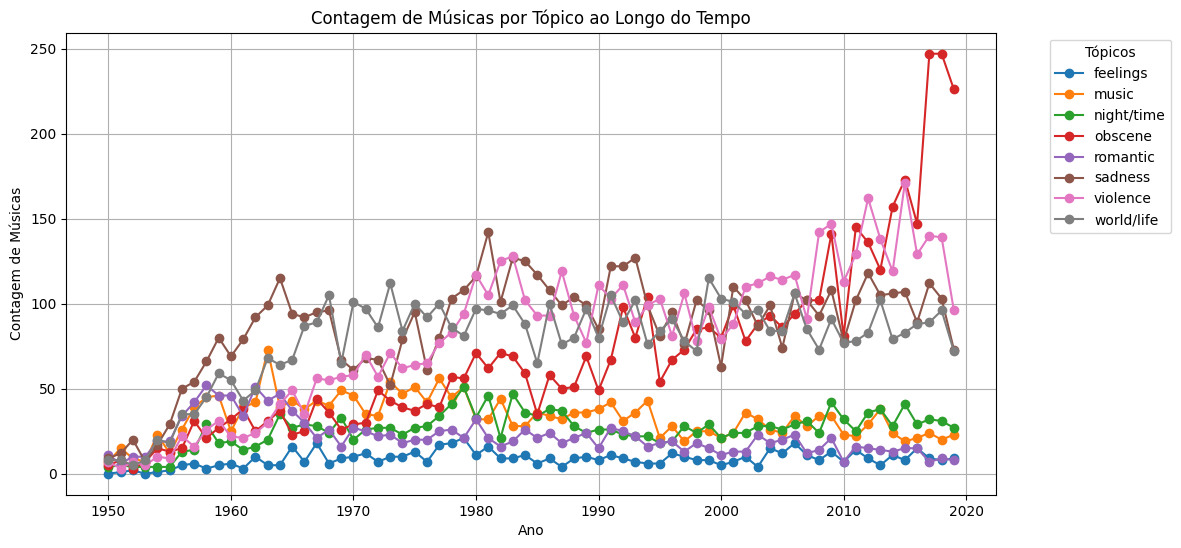

In [ ]:
topicos_counts = music_df.groupby(['release_year', 'topic']).size().reset_index(name='count')

topicos = topicos_counts.pivot(index='release_year', columns='topic', values='count').fillna(0)

plt.figure(figsize=(12, 6))


for topico in topicos.columns:
        plt.plot(topicos.index, topicos[topico], marker='o', label=topico)

plt.title('Contagem de Músicas por Tópico ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Contagem de Músicas')
plt.grid()
plt.legend(title='Tópicos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

▶ Com este gráfico, podemos observar como os temas musicais relevantes mudaram ao longo do tempo. Por exemplo, notamos um destaque significativo para músicas tristes no início dos anos 80, período em que a subcultura gótica surgiu no Reino Unido. Um pouco antes, na mesma região, após a metade dos anos 70, o movimento punk também ganhou força, trazendo músicas que criticavam a sociedade da época e abordavam temas violentos, algo que também é evidente no gráfico.

À medida que o tempo passou, houve um aumento na produção de músicas com conteúdo explícito, refletindo um afastamento de conceitos conservadores e uma maior liberdade de expressão em relação a temas considerados mais explícitos.

Para confirmar isso vamos ver artistas em destaque por décadas tabém.

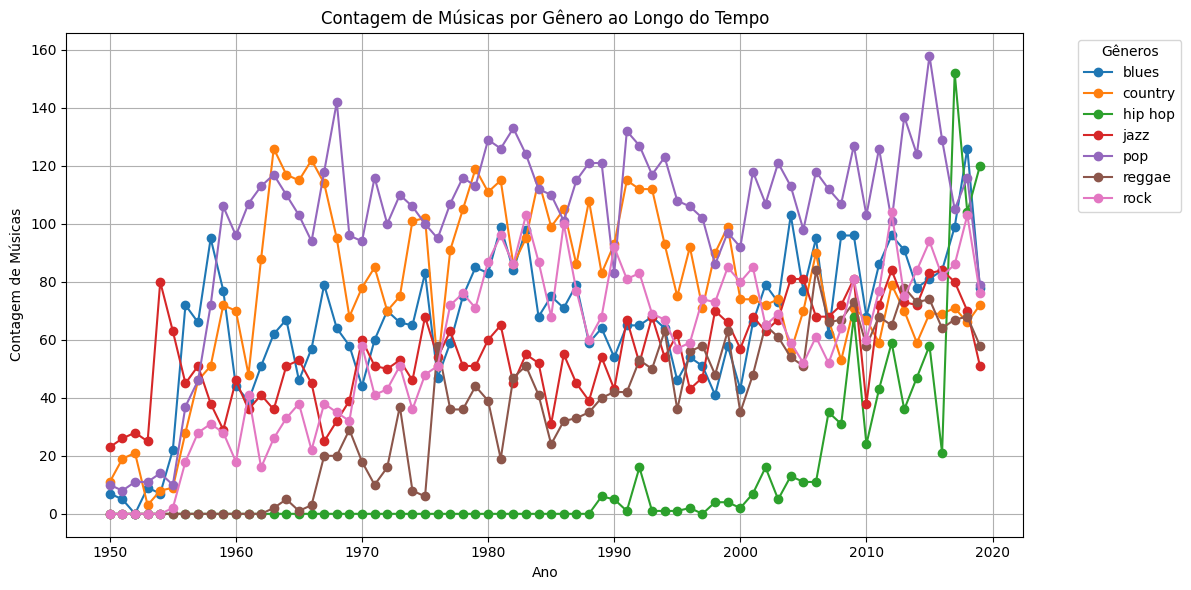

In [ ]:
generos_counts = music_df.groupby(['release_year', 'genre']).size().reset_index(name='count')

generos = generos_counts.pivot(index='release_year', columns='genre', values='count').fillna(0)

plt.figure(figsize=(12, 6))

for genero in generos.columns:
    plt.plot(generos.index, generos[genero], marker='o', label=genero)

plt.title('Contagem de Músicas por Gênero ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Contagem de Músicas')
plt.grid()
plt.legend(title='Gêneros', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Talvez seja mais interessante fazer um barchart para ver essas informações de destques de gêneros por época.

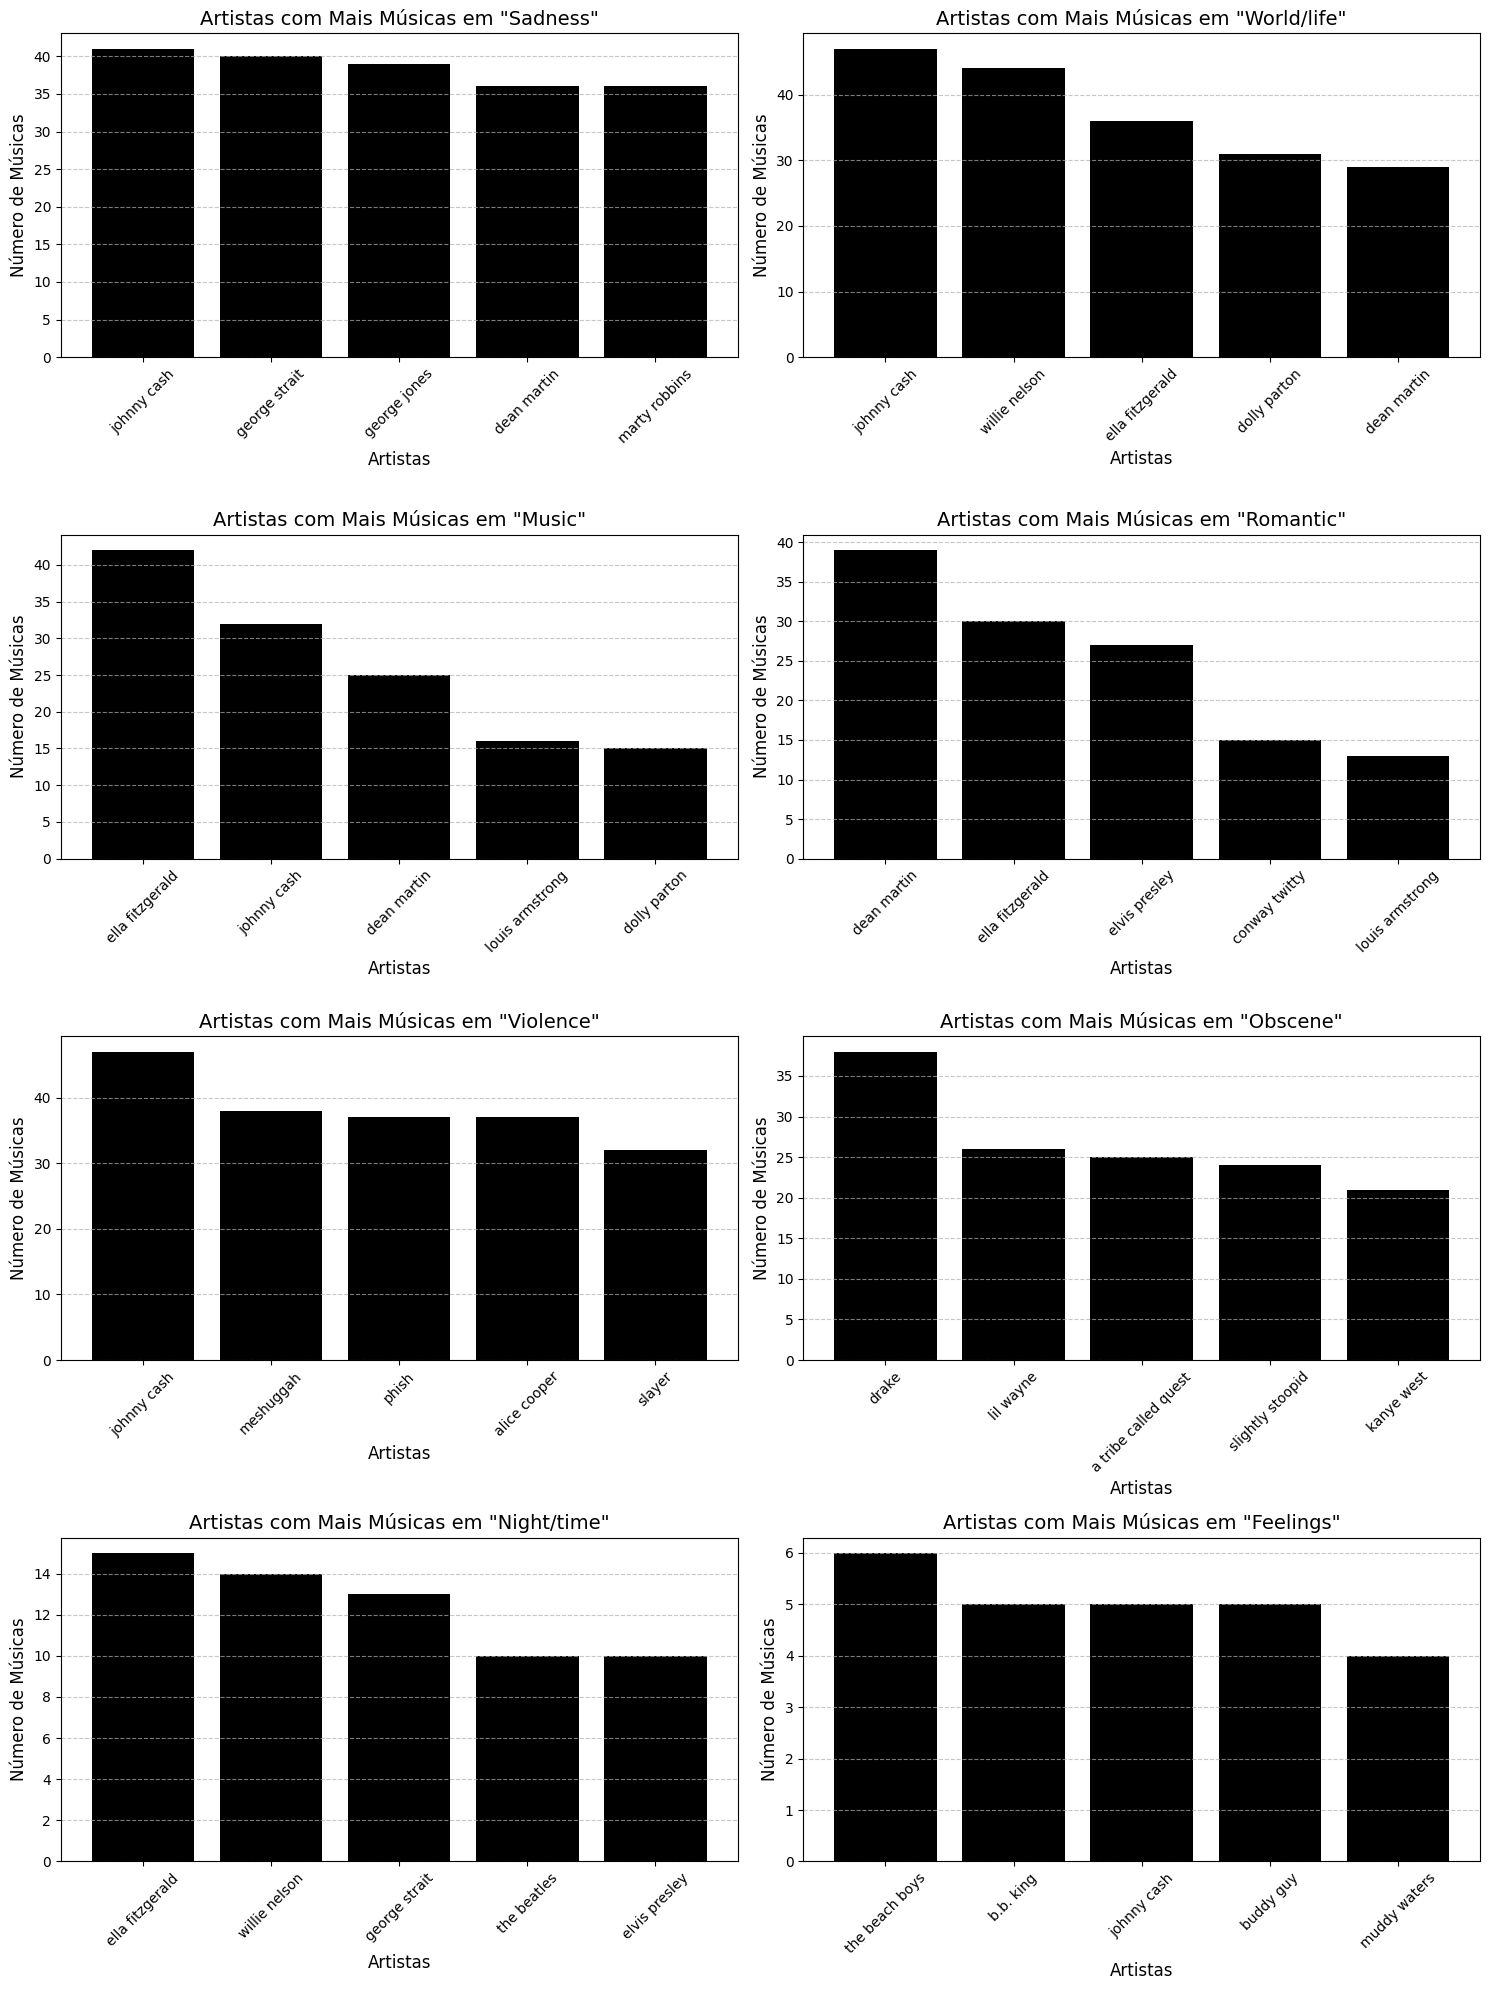

In [ ]:
topics = music_df['topic'].unique()

n_rows = len(topics) // 2 + len(topics) % 2
fig, axs = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axs = axs.flatten()

for i, topic in enumerate(topics):
    topic_data = music_df[music_df['topic'] == topic]
    artist_counts = topic_data['artist_name'].value_counts().head(5)

    axs[i].bar(artist_counts.index, artist_counts.values, color='black')
    axs[i].set_title(f'Artistas com Mais Músicas em "{topic.capitalize()}"', fontsize=14)
    axs[i].set_xlabel('Artistas', fontsize=12)
    axs[i].set_ylabel('Número de Músicas', fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

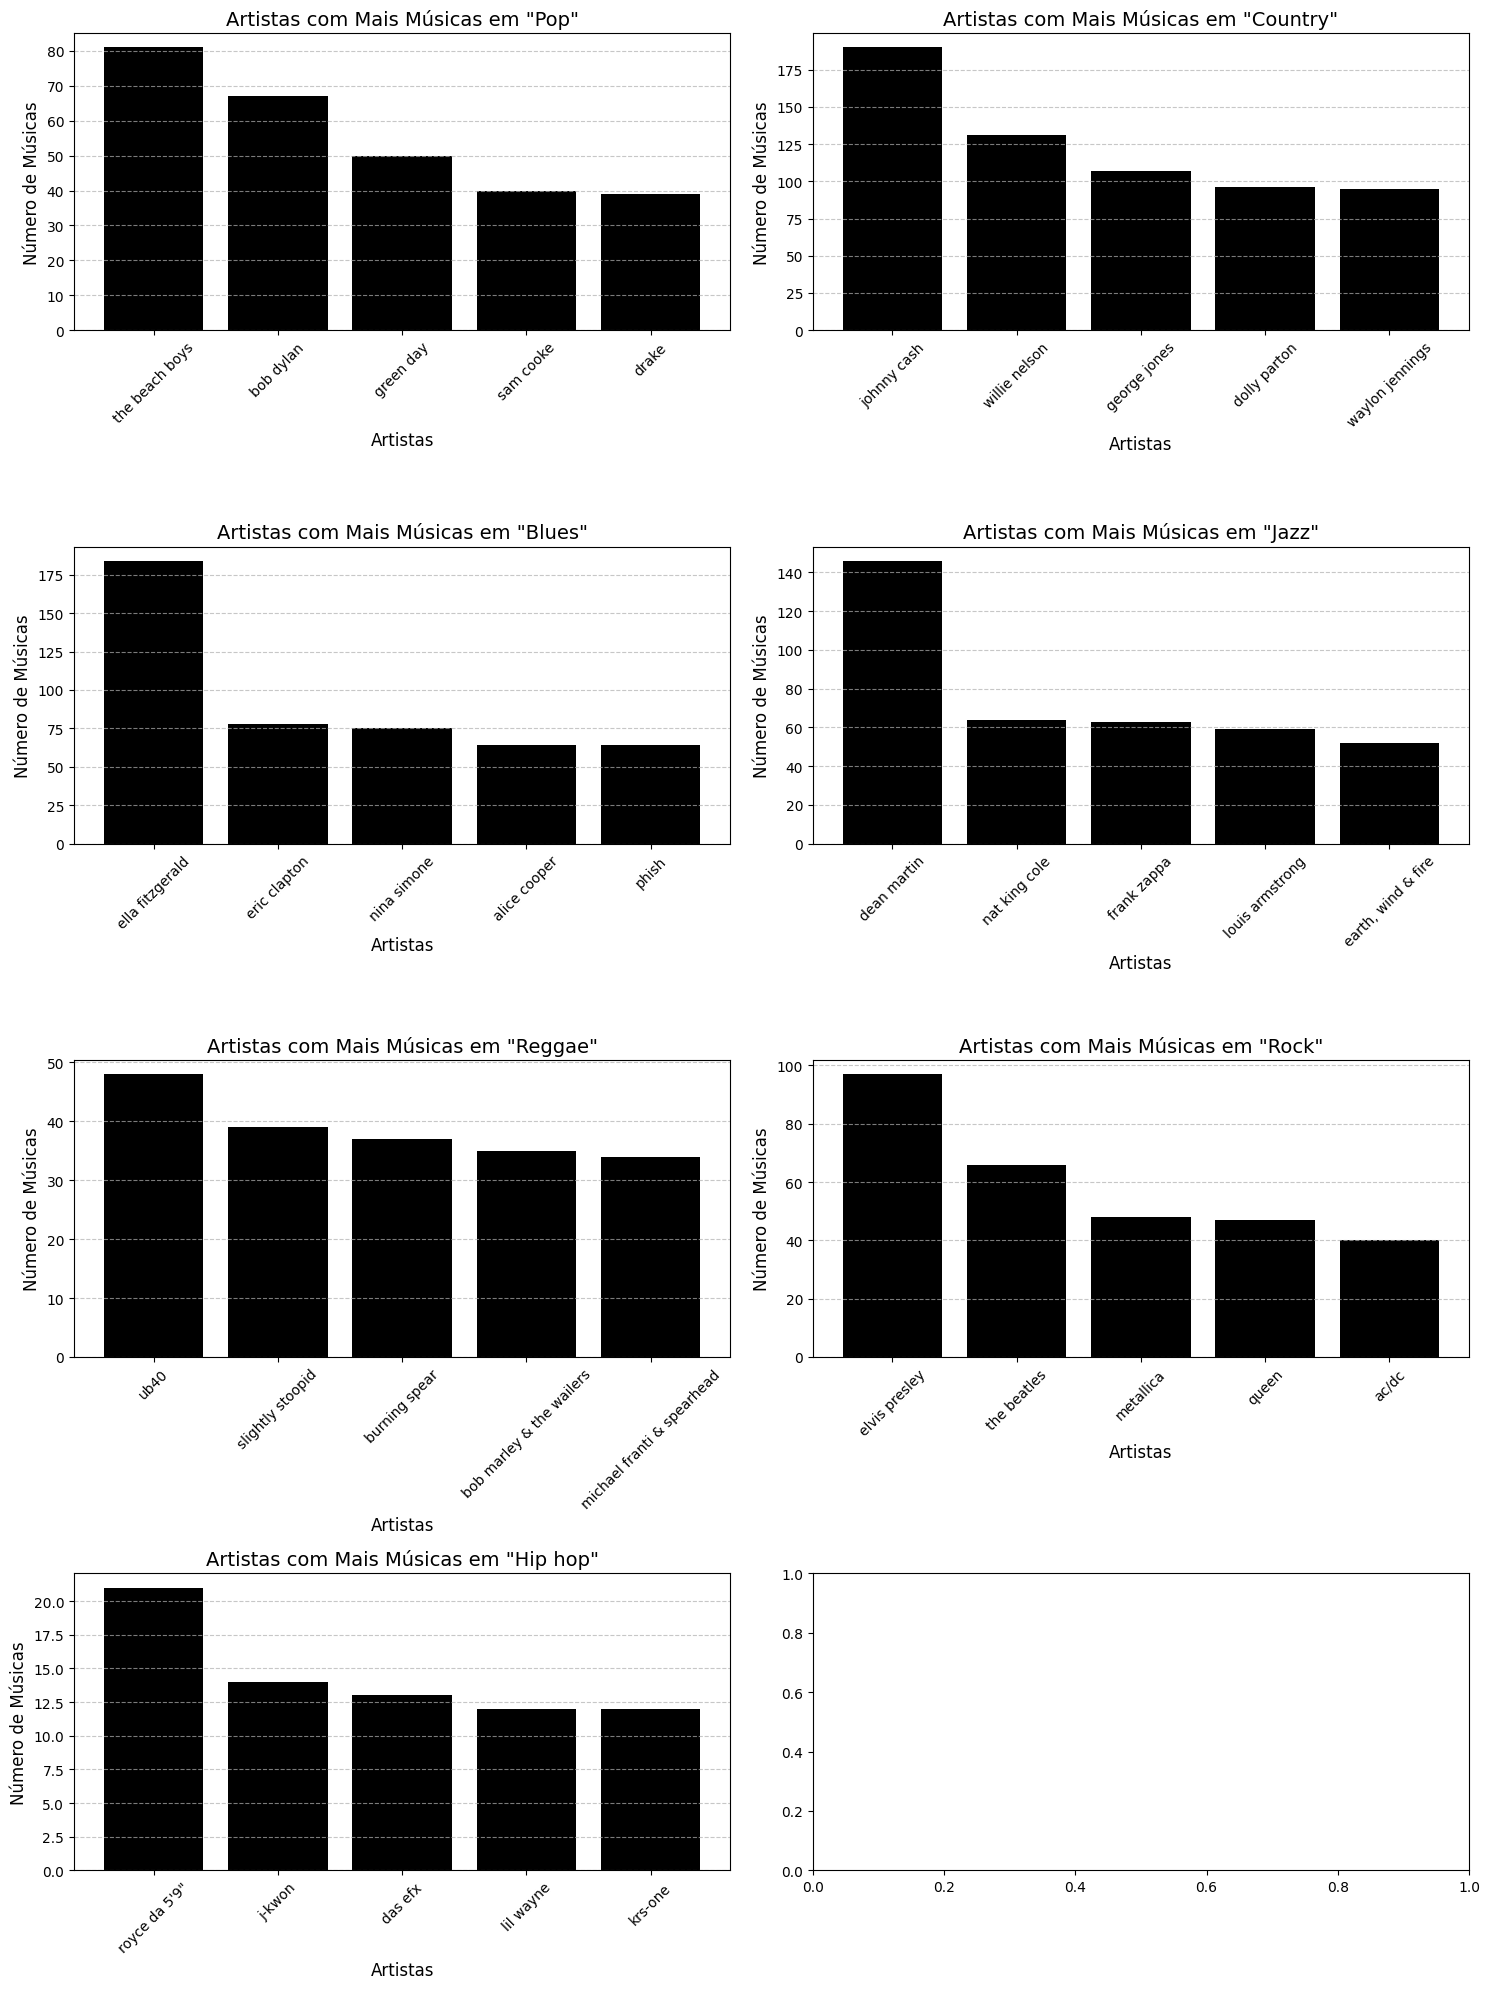

In [ ]:
generos = music_df['genre'].unique()

n_rows_generos = len(generos) // 2 + len(generos) % 2
fig, axs = plt.subplots(n_rows_generos, 2, figsize=(15, n_rows_generos * 5))
axs = axs.flatten()

for j, genre in enumerate(generos):
    genre_data = music_df[music_df['genre'] == genre]
    artist_counts = genre_data['artist_name'].value_counts().head(5)

    axs[j].bar(artist_counts.index, artist_counts.values, color='black')
    axs[j].set_title(f'Artistas com Mais Músicas em "{genre.capitalize()}"', fontsize=14)
    axs[j].set_xlabel('Artistas', fontsize=12)
    axs[j].set_ylabel('Número de Músicas', fontsize=12)
    axs[j].tick_params(axis='x', rotation=45)
    axs[j].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


É interessante observar as intereseções destes dois plots. Por exemplo, Johnny Cash que tem muitas músicas tristes é também produtor de muita música country, enquanto artistas de hiphop produzem mutias músicas com tópicos obscenos. Essa visualização de interseções pode ser interessante.

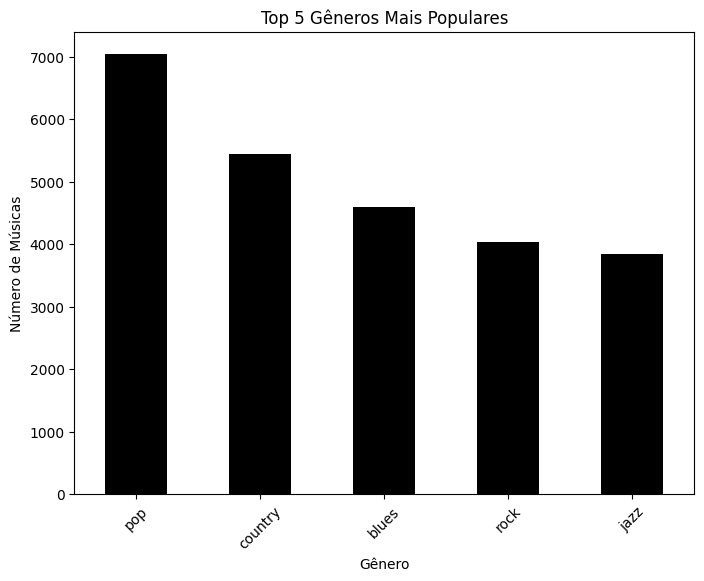

In [ ]:
genre_counts = music_df['genre'].value_counts().nlargest(5)

plt.figure(figsize=(8,6))
genre_counts.plot(kind='bar', color='black')
plt.title('Top 5 Gêneros Mais Populares')
plt.xlabel('Gênero')
plt.ylabel('Número de Músicas')
plt.xticks(rotation=45)
plt.show()

In [ ]:
music_df.head()

,artist_name,track_name,release_year,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
music_df.to_csv('music_data_cleaned.csv', index=False)


In [ ]:
from google.colab import files
files.download('music_data_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>